In [1]:
# En esta lección, aprenderemos a usar scikit-learn para implementar la regresión 
# lineal múltiple. Descargamos un conjunto de datos relacionados con el consumo de combustible 
# y la emisión de dióxido de carbono de los automóviles. Luego, dividimos nuestros datos en conjuntos 
# de entrenamiento y pruebas, creamos un modelo usando el conjunto de entrenamiento, 
# evaluamos su modelo usando el conjunto de pruebas y finalmente usamos el modelo 
# para predecir el valor desconocido.

In [2]:
# Importando paquetes necesarios
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
data = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUELTYPE e.g. z
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [6]:
df = pd.read_csv(data)
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


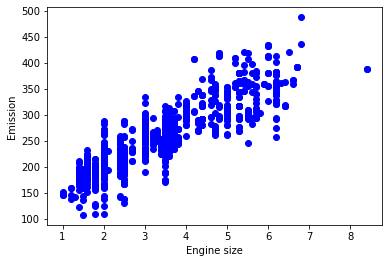

In [7]:
# Tracemos los valores de las emisiones con respecto al tamaño del motor:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Creating train and test dataset

# La división entrenamiento/Pruebas implica dividir el conjunto de datos en conjuntos de entrenamiento(train)
# y de pruebas(prueba) respectivamente, que son mutuamente excluyentes. Después de lo cual, usted 
# entrena con el equipo de entrenamiento y prueba con el equipo de prueba. Esto proporcionará 
# una evaluación más precisa de la precisión fuera de la muestra, ya que el conjunto de datos 
# de la prueba no forma parte del conjunto de datos que se ha utilizado para entrenar los datos. 
# Es más realista para los problemas del mundo real.

# Esto significa que conocemos el resultado de cada punto de datos de este conjunto de datos, 
# lo que hace que sea genial probarlo. Y puesto que estos datos no han sido usados para entrenar 
# al modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Así que, 
# en esencia, es realmente una prueba fuera de la muestra.

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

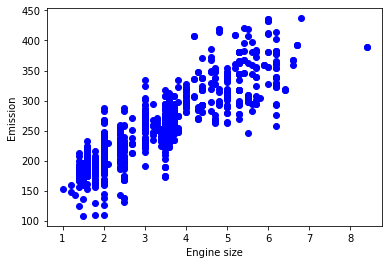

In [9]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Multiple Regression Model

# En realidad, existen múltiples variables que predicen la emisión de CO2. 
# Cuando hay más de una variable independiente presente, el proceso se denomina 
# regresión lineal múltiple. Por ejemplo, predecir las emisiones de co2 utilizando 
# FUELCONSUMPTION_COMB, EngineSize (tamaño del motor) y Cilindros de automóviles. 
# Lo bueno aquí es que la regresión lineal múltiple es la extensión del modelo de 
# regresión lineal simple.

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coeficientes: ', regr.coef_, ' - Intercepto: ', regr.intercept_)

Coeficientes:  [[10.72613477  7.39104931  9.62488857]]  - Intercepto:  [65.78123863]


In [ ]:
# Como se mencionó anteriormente, Coefficient e Intercept , son los parámetros de la línea curva de ajuste. 
# Dado que se trata de una regresión lineal múltiple, con 3 parámetros, y sabiendo que los 
# parámetros son la intercepción y los coeficientes del hiperplano, sklearn puede estimarlos 
# a partir de nuestros datos. Scikit-learn utiliza el método de los mínimos cuadrados 
# ordinarios para resolver este problema.

In [ ]:
# Ordinary Least Squares (OLS) (Mínimos cuadrados ordinarios) (MCO) o mínimos cuadrados lineales

# OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. 
# OLS elige los parámetros de una función lineal de un conjunto de variables explicativas 
# minimizando la suma de los cuadrados de las diferencias entre la variable objetivo dependiente 
# y las previstas por la función lineal. En otras palabras, intenta minimizar la suma de 
# errores cuadrados (SSE) o el error cuadrado medio (MSE) entre la variable objetivo (y) 
# y nuestro resultado previsto ($hathat{y}$) en todas las muestras del conjunto de datos.

# OLS puede encontrar los mejores parámetros usando los siguientes métodos:
# - Resolución analítica de los parámetros del modelo mediante ecuaciones de forma cerrada
# - Utilizando un algoritmo de optimización (Descenso de Gradiente, Descenso de Gradiente 
#   Estocástico, Método de Newton, etc.)

In [21]:
# Prediction

y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

# https://en.wikipedia.org/wiki/Residual_sum_of_squares
print("Suma de cuadrados de los residuos: %.2f"
      % np.mean((y_hat - y) ** 2))

# Scikit-Learn incluye tres diferentes APIs para evaluar la calidad de una predicción:

# Método "score": Todos los algoritmos incluyen un método "score" que provee el resultado de un criterio 
# de evaluación por defecto para aquel problema al que están orientados. 
# De esta manera, el método score de un modelo de clasificación basado en árbol 
# de decisión, DecisionTreeClassifier, devuelve la precisión del modelo, 
# entendida como el porcentaje de valores clasificados correctamente con 
# respecto al total de elementos. O una regresión lineal devuelve el 
# coeficiente de determinación, o R2, entendida como el porcentaje de la variancia 
# de la variable dependiente que es predecible a partir de la variable independiente.

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Suma de cuadrados de los residuos: 449.69
Variance score: 0.90


In [ ]:
# explained variance regression score:
# Si  𝑦̂   es la salida teórica estimada, y la salida teórica correspondiente (correcta), y 
# Var es Varianza, el cuadrado de la desviación estándar, entonces la varianza explicada 
# se estima de la siguiente manera:

# 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−[𝑉𝑎𝑟{𝑦−𝑦̂ } / 𝑉𝑎𝑟{𝑦}]
# La mejor puntuación posible es 1.0, los valores más bajos son peores.

In [22]:
# usar una regresión lineal múltiple con el mismo conjunto de datos pero esta vez 
# use __FUEL CONSUMPTION (CONSUMO DE COMBUSTIBLE) en CITY__ y FUEL CONSUMPTION en 
# HWY__ en lugar de FUELCONSUMPTION_COMB. ¿Resulta en una mejor precisión?

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.77110132  7.14582749  5.94931727  3.46864782]]
Residual sum of squares: 449.54
Variance score: 0.90
